In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pygam import s, ExpectileGAM

In [13]:
# Data Generation

np.random.seed(0)
n = 100
price = np.sort(np.random.exponential(scale=100, size=n))
quantity = 1000 - 5 * price + np.random.normal(loc=0, scale=50, size=n)
quantity = quantity.clip(min=0)

In [14]:
# Add outliers
n_outliers = 10
outlier_prices = np.random.uniform(5, 50, n_outliers)
outlier_quantity = 1100 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

In [15]:
# Add outliers 2
n_outliers = 10
outlier_prices = np.random.uniform(51, 100, n_outliers)
outlier_quantity = 900 + np.random.normal(loc=0, scale=50, size=n_outliers)
price = np.concatenate([price, outlier_prices])
quantity = np.concatenate([quantity, outlier_quantity])

In [16]:
df = pd.DataFrame({
    'Price': price,
    'Quantity': quantity
})

In [17]:
# Filter out prices less than 5

df = df[df['Price'] >= 5]

df.head()

,Price,Quantity
5,6.211530,1063.736811
6,6.629740,1025.790280
7,7.368535,954.161081
8,9.116103,900.881854
9,9.865031,1003.397430


In [18]:
# Reshape data
X = df['Price']
y = df['Quantity']

In [19]:
# Quantile GAMs

quantiles = [0.025, 0.5, 0.975]
gam_results = {}

for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    
gam_results

{0.025: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.025, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.5: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.5, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False),
 0.975: ExpectileGAM(callbacks=[Deviance(), Diffs()], expectile=0.975, 
    fit_intercept=True, max_iter=100, scale=None, 
    terms=s(0) + intercept, tol=0.0001, verbose=False)}

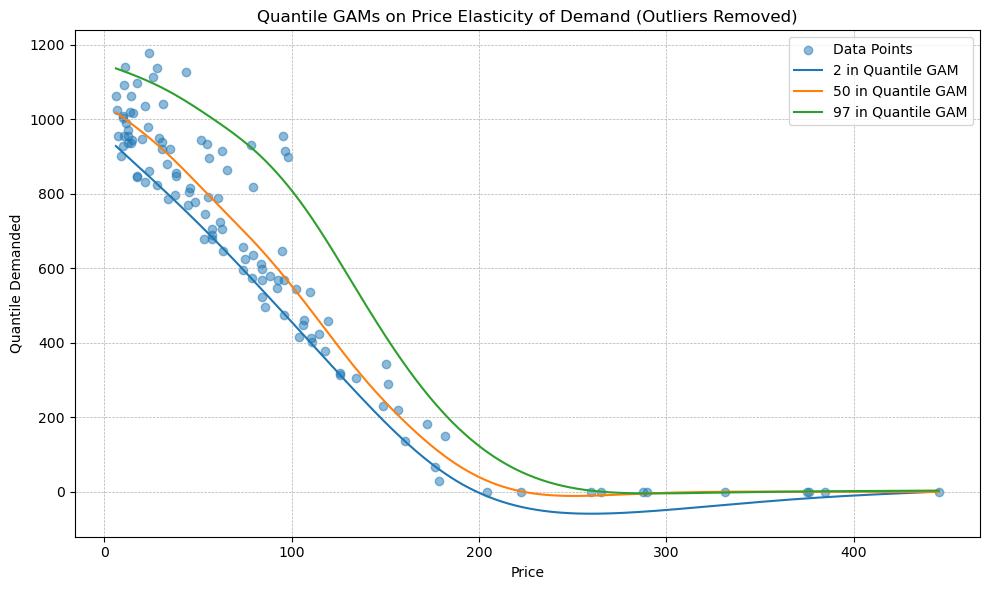

In [20]:
# Visualization

plt.figure(figsize=(10, 6))
plt.scatter(df['Price'], df['Quantity'], alpha=0.5, label='Data Points')

# Plot Quantile GAMs
xx = np.linspace(df['Price'].min(), df['Price'].max(), 1000).reshape(-1, 1)

for q, gam in gam_results.items():
    plt.plot(xx, gam.predict(xx), 
             label=f'{int(q*100)} in Quantile GAM')

plt.xlabel('Price')
plt.ylabel('Quantile Demanded')
plt.title('Quantile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()